In [10]:
import csv
import spacy
import re
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

In [11]:
# Fonction de normalisation du texte
def normalize_text(text):
    text = text.lower()  # conversion en minuscules
    text = re.sub(r'\s+', ' ', text)  # suppression des espaces inutiles
    text = re.sub(r'[^\w\s]', '', text)  # suppression des signes de ponctuation
    return text.strip()  # suppression des espaces au début et à la fin du texte

# Chemins d'accès aux fichiers
input_file = "translations.csv"
output_file = "translations_normalized.csv"

with open(input_file, 'r', encoding='utf-8') as infile, open(output_file, 'w', encoding='utf-8', newline='') as outfile:
    reader = csv.DictReader(infile, delimiter=",")
    writer = csv.DictWriter(outfile, fieldnames=reader.fieldnames)
    
    writer.writeheader()
    
    # Parcourir chaque ligne du fichier CSV
    for row in reader:
        # Normaliser les textes dans les colonnes "en" et "pl".
        row['pl'] = normalize_text(row['pl'])
        row['en'] = normalize_text(row['en'])
        
        # Sauvegarde de la ligne mise à jour dans un nouveau fichier CSV
        writer.writerow(row)

In [12]:
# Chargement du modèle de spaCy pour l'anglais
nlp = spacy.load("en_core_web_sm")

In [13]:
# Initialiser un compteur
sentence_count = 0

# Ouvrir le fichier CSV
with open("translations_normalized.csv", 'r', encoding='utf-8') as file:
    reader = csv.DictReader(file, delimiter=",")

    # Parcourir chaque ligne du fichier CSV
    for row in reader:
        if sentence_count >= 5:
            break

        # Récupérer le texte de la colonne "en"
        phrase_fr = row['en']

        # Traiter le texte avec le modèle spaCy
        doc = nlp(phrase_fr)

        # Afficher les résultats de l'analyse syntaxique pour chaque token
        print(f"Phrase: {phrase_fr}")
        for token in doc:
            print(f"Texte: {token.text}, POS: {token.pos_}, Lemme: {token.lemma_}, Dépendance: {token.dep_}, Gouverneur: {token.head.text}")
        print("\n" + "-"*50 + "\n")

        # Incrémenter le compteur
        sentence_count += 1

Phrase: this book opens the door to the world which most of us dont know
Texte: this, POS: DET, Lemme: this, Dépendance: det, Gouverneur: book
Texte: book, POS: NOUN, Lemme: book, Dépendance: nsubj, Gouverneur: opens
Texte: opens, POS: VERB, Lemme: open, Dépendance: ROOT, Gouverneur: opens
Texte: the, POS: DET, Lemme: the, Dépendance: det, Gouverneur: door
Texte: door, POS: NOUN, Lemme: door, Dépendance: dobj, Gouverneur: opens
Texte: to, POS: ADP, Lemme: to, Dépendance: prep, Gouverneur: door
Texte: the, POS: DET, Lemme: the, Dépendance: det, Gouverneur: world
Texte: world, POS: NOUN, Lemme: world, Dépendance: pobj, Gouverneur: to
Texte: which, POS: PRON, Lemme: which, Dépendance: dobj, Gouverneur: know
Texte: most, POS: ADJ, Lemme: most, Dépendance: nsubj, Gouverneur: know
Texte: of, POS: ADP, Lemme: of, Dépendance: prep, Gouverneur: most
Texte: us, POS: PRON, Lemme: we, Dépendance: pobj, Gouverneur: of
Texte: do, POS: AUX, Lemme: do, Dépendance: aux, Gouverneur: know
Texte: nt, POS:

In [14]:
# Charger un modèle linguistique pour le polonais
nlp = spacy.load('pl_core_news_sm')

In [15]:
# Initialiser un compteur
sentence_count = 0

# Ouvrir le fichier CSV
with open("translations_normalized.csv", 'r', encoding='utf-8') as file:
    reader = csv.DictReader(file, delimiter=",")

    # Parcourir chaque ligne du fichier CSV
    for row in reader:
        if sentence_count >= 5:
            break

        # Récupérer le texte de la colonne "pl"
        phrase_pl = row['pl']

        # Traiter le texte avec le modèle spaCy
        doc = nlp(phrase_pl)

        # Afficher les résultats de l'analyse syntaxique pour chaque token
        print(f"Phrase: {phrase_pl}")
        for token in doc:
            print(f"Texte: {token.text}, POS: {token.pos_}, Lemme: {token.lemma_}, Dépendance: {token.dep_}, GOV: {token.head.text}")
        print("\n" + "-"*50 + "\n")

        # Incrémenter le compteur
        sentence_count += 1

Phrase: ta książka otwiera drzwi do świata którego większość z nas nie zna
Texte: ta, POS: DET, Lemme: ten, Dépendance: det, GOV: książka
Texte: książka, POS: NOUN, Lemme: książka, Dépendance: nsubj, GOV: otwiera
Texte: otwiera, POS: VERB, Lemme: otwierać, Dépendance: ROOT, GOV: otwiera
Texte: drzwi, POS: NOUN, Lemme: drzwi, Dépendance: obj, GOV: otwiera
Texte: do, POS: ADP, Lemme: do, Dépendance: case, GOV: świata
Texte: świata, POS: NOUN, Lemme: świat, Dépendance: nmod, GOV: drzwi
Texte: którego, POS: ADJ, Lemme: który, Dépendance: det, GOV: świata
Texte: większość, POS: NOUN, Lemme: większość, Dépendance: nsubj, GOV: zna
Texte: z, POS: ADP, Lemme: z, Dépendance: case, GOV: nas
Texte: nas, POS: PRON, Lemme: my, Dépendance: nmod:arg, GOV: większość
Texte: nie, POS: PART, Lemme: nie, Dépendance: advmod:neg, GOV: zna
Texte: zna, POS: VERB, Lemme: znać, Dépendance: conj, GOV: otwiera

--------------------------------------------------

Phrase: to lektura obowiązkowa dla tych którzy chcą 

In [16]:
df = pd.read_csv("translations_normalized.csv")

# Fonction permettant de convertir les valeurs des colonnes en chaînes de caractères
def convert_to_string(column_name):
    df[column_name] = df[column_name].astype(str)

# Appel de la fonction pour les deux colonnes
convert_to_string("en")
convert_to_string("pl")

# Vérifier que les nombres ont été convertis en chaînes de caractères
print(df.dtypes)


id     int64
en    object
pl    object
dtype: object


In [17]:
# Vérifier quelles cellules de la colonne "pl" contiennent des valeurs NaN
nan_rows_pl = df[df['pl'].isnull()]
print(nan_rows_pl)

# Vérifier quelles cellules de la colonne "en" contiennent des valeurs NaN
nan_rows_en = df[df['en'].isnull()]
print(nan_rows_en)


Empty DataFrame
Columns: [id, en, pl]
Index: []
Empty DataFrame
Columns: [id, en, pl]
Index: []


In [18]:
# Remplacer les valeurs NaN par des chaînes vides dans la colonne "en"
df['pl'] = df['pl'].fillna('')

# Remplacer les valeurs NaN par des chaînes vides dans la colonne "en"
df['en'] = df['en'].fillna('')


In [19]:
df = pd.read_csv("translations.csv")

# Chargement des modèles linguistiques spaCy
nlp_en = spacy.load("en_core_web_sm")
nlp_pl = spacy.load("pl_core_news_sm")

# Fonction de tokenisation et de calcul du nombre de phrases et de mots
def analyze_text(text, nlp):
    if pd.isna(text):  # Vérifier que la valeur est vide
        return 0, 0  # Si oui, renvoyer 0 pour le nombre de phrases et de mots
    doc = nlp(text)
    num_sentences = len(list(doc.sents))
    num_words = len(doc)
    return num_sentences, num_words

# Parcourir chaque phrase du corpus et calculer les statistiques pour les deux langues
stats_en = {"num_sentences": 0, "num_words": 0}
stats_pl = {"num_sentences": 0, "num_words": 0}
for index, row in df.iterrows():
    num_sentences_en, num_words_en = analyze_text(row["en"], nlp_en)
    num_sentences_pl, num_words_pl = analyze_text(row["pl"], nlp_pl)
    
    stats_en["num_sentences"] += num_sentences_en
    stats_en["num_words"] += num_words_en
    stats_pl["num_sentences"] += num_sentences_pl
    stats_pl["num_words"] += num_words_pl

# Affichage des résultats
print("Statistiques pour l'anglais :")
print("Nombre de phrases :", stats_en["num_sentences"])
print("Nombre de mots :", stats_en["num_words"])
print()

print("Statistiques pour le polonais :")
print("Nombre de phrases :", stats_pl["num_sentences"])
print("Nombre de mots :", stats_pl["num_words"])


Statistiques pour l'anglais :
Nombre de phrases : 126
Nombre de mots : 3097

Statistiques pour le polonais :
Nombre de phrases : 125
Nombre de mots : 2832


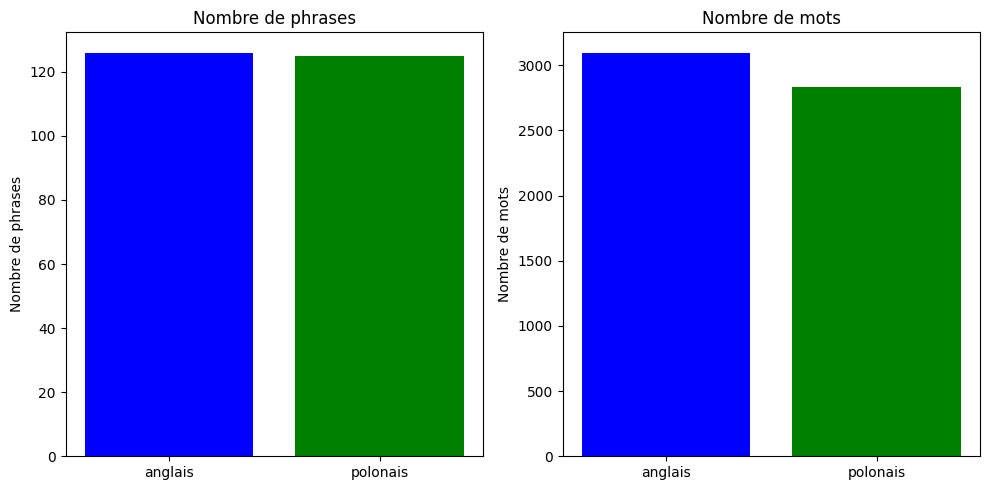

In [14]:
# Données pour la visualisation
languages = ['anglais', 'polonais']
num_sentences = [stats_en["num_sentences"], stats_pl["num_sentences"]]
num_words = [stats_en["num_words"], stats_pl["num_words"]]

# Création de visualisations
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Diagramme du nombre de phrases
axes[0].bar(languages, num_sentences, color=['blue', 'green'])
axes[0].set_title('Nombre de phrases')
axes[0].set_ylabel('Nombre de phrases')

# Diagramme du nombre de mots
axes[1].bar(languages, num_words, color=['blue', 'green'])
axes[1].set_title('Nombre de mots')
axes[1].set_ylabel('Nombre de mots')

# Wyświetlenie wykresu
plt.tight_layout()
plt.show()


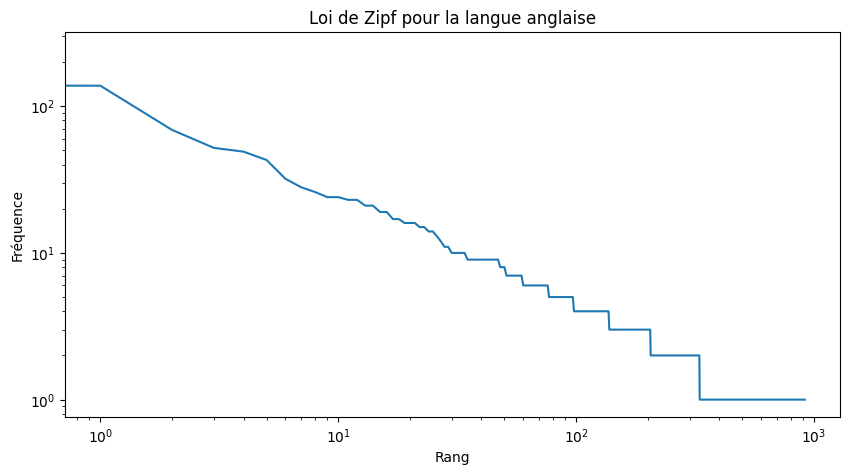

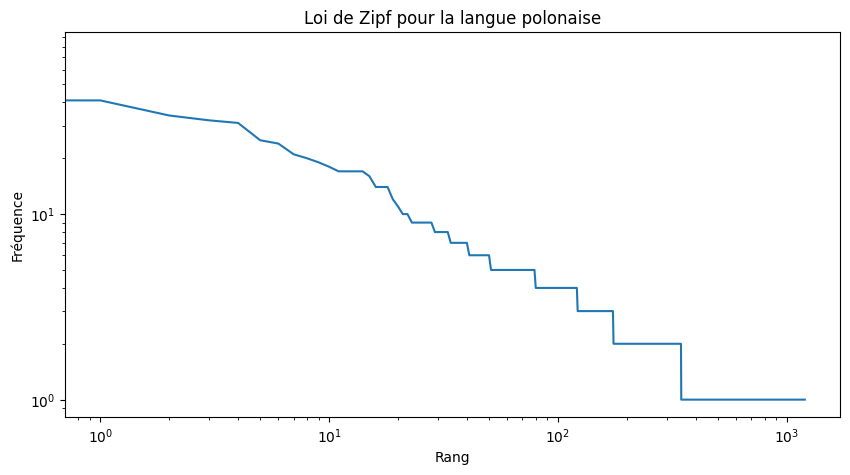

In [15]:
df = pd.read_csv("translations.csv")

nlp_en = spacy.load("en_core_web_sm")
nlp_pl = spacy.load("pl_core_news_sm")

# Fonction de tokenisation et de comptage de mots
def count_words(text, nlp):
    if pd.isna(text):
        return []
    doc = nlp(text)
    return [token.text for token in doc if not token.is_punct and not token.is_space]

# Nombre de mots pour les deux langues
word_counts_en = Counter()
word_counts_pl = Counter()

for index, row in df.iterrows():
    words_en = count_words(row["en"], nlp_en)
    words_pl = count_words(row["pl"], nlp_pl)
    word_counts_en.update(words_en)
    word_counts_pl.update(words_pl)

# Fonction de création d'un diagramme de Zipf
def plot_zipf(word_counts, title):
    sorted_counts = sorted(word_counts.values(), reverse=True)
    plt.figure(figsize=(10, 5))
    plt.plot(sorted_counts)
    plt.yscale('log')
    plt.xscale('log')
    plt.title(title)
    plt.xlabel("Rang")
    plt.ylabel("Fréquence")
    plt.show()

plot_zipf(word_counts_en, "Loi de Zipf pour la langue anglaise")
plot_zipf(word_counts_pl, "Loi de Zipf pour la langue polonaise")